In [23]:
%matplotlib inline
import torch
import numpy as np 
from d2l import torch as d2l

In [32]:
def box_corner_to_center(boxes):
    """从（左上，右下）转换到（中间，宽度，⾼度）"""
    x1, y1, x2, y2 = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    cx = (x1 + x2) / 2
    cy = (y1 + y2) / 2 
    w = x2 - x1
    h = y2 - y1
    boxes = np.stack((cx, cy, w, h), axis=-1)
    return boxes


def box_center_to_corner(boxes):
    """从（中间，宽度，⾼度）转换到（左上，右下）"""
    cx, cy, w, h = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    x1 = cx - 0.5 * w
    y1 = cy - 0.5 * h
    x2 = cx + 0.5 * w
    y2 = cy + 0.5 * h
    boxes = np.stack((x1, y1, x2, y2), axis=-1)
    return boxes

# def bbox_to_rect(bbox, color):
# # 将边界框(左上x,左上y,右下x,右下y)格式转换成matplotlib格式：
# # ((左上x,左上y),宽,⾼)
#     return d2l.plt.Rectangle(
#         xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
#         fill=False, edgecolor=color, linewidth=2)

def bbox_to_rect(bbox, color):
# ((左上x,左上y),宽,⾼)
    return d2l.plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2], height=bbox[3],
        fill=False, edgecolor=color, linewidth=2)

In [4]:
import json

def read_json(path):
    with open(path, 'r') as f:
        for line in f:
            temp = json.loads(line)        
    
    return temp

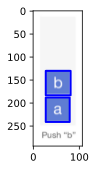

In [49]:
def draw(index, img, cords): 
    
    d2l.set_figsize()
    fig = d2l.plt.imshow(img)
    for i in cords:
        fig.axes.add_patch(bbox_to_rect(i,'blue'))

        
path = './Q.json'
data_json = read_json(path)

index = str(20)
iname = data_json[index]['diagram_path'].split("\\")[-1]
img = d2l .plt.imread('./Diagrams/' + iname)
cords = data_json[index]['cords']

draw(index, img, cords)

In [ ]:
for index in range(6):

    index = str(index+1)
    iname = data_json[index]['diagram_path'].split("\\")[-1]
    img = d2l .plt.imread('./Diagrams/' + iname)
    cords = data_json[index]['cords']

    draw(index, img, cords)